In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# SVM

In [10]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split


def objective(trial):

    params = {
        'C': trial.suggest_loguniform('C', 1e-1, 1e1),
         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1), 
        
    }
    model = SVR(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
best_params = study.best_params
best_mse = study.best_value
print('Best Params: ', best_params)
print('Best MSE: ', best_mse)

[I 2024-01-01 10:54:32,007] A new study created in memory with name: no-name-0110d777-9855-4c7b-a91e-946a0314ac12
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:32,032] Trial 0 finished with value: 0.0018851708648958709 and parameters: {'C': 3.2211593947542716, 'gamma': 0.25576931975807704}. Best is trial 0 with value: 0.0018851708648958709.
C:\Users\zhaokaiyang\Ap

[I 2024-01-01 10:54:35,120] Trial 9 finished with value: 0.04691052565382644 and parameters: {'C': 6.314088764423906, 'gamma': 3.7941010720998604e-06}. Best is trial 0 with value: 0.0018851708648958709.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:35,146] Trial 10 finished with value: 0.0020039045975051724 and parameters: {'C': 9.981823100852322, 'gamma': 0.74626

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:36,263] Trial 20 finished with value: 0.006039502326102027 and parameters: {'C': 5.214290453159034, 'gamma': 0.0026761151194575608}. Best is trial 18 with value: 0.001724135287332591.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:36,734] Trial 30 finished with value: 0.001780471552997869 and parameters: {'C': 2.9909516212734086, 'gamma': 0.40339904063262344}. Best is trial 29 with value: 0.001639497025051949.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

[I 2024-01-01 10:54:37,297] Trial 39 finished with value: 0.003211648237961138 and parameters: {'C': 2.0561051124147895, 'gamma': 0.023359107422427798}. Best is trial 35 with value: 0.0015679803736194414.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:37,313] Trial 40 finished with value: 0.0017814338375427632 and parameters: {'C': 1.3794834223349894, 'gamma': 0.18

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:37,798] Trial 50 finished with value: 0.0019490953163451706 and parameters: {'C': 7.774977316282423, 'gamma': 0.4461493968174308}. Best is trial 35 with value: 0.0015679803736194414.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:38,137] Trial 60 finished with value: 0.001761153716377624 and parameters: {'C': 5.756997084720958, 'gamma': 0.09870869854940229}. Best is trial 35 with value: 0.0015679803736194414.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:38,501] Trial 70 finished with value: 0.0016977049629176108 and parameters: {'C': 6.416712994088674, 'gamma': 0.08132842868878423}. Best is trial 62 with value: 0.0015667968099588694.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:38,913] Trial 80 finished with value: 0.0021154894616469324 and parameters: {'C': 2.8800783647174564, 'gamma': 0.9996325846753032}. Best is trial 71 with value: 0.0015559301946909548.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-1, 1e1),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
[I 2024-01-01 10:54:39,234] Trial 90 finished with value: 0.002021201560722697 and parameters: {'C': 4.278789759193929, 'gamma': 0.046591092833951714}. Best is trial 71 with value: 0.0015559301946909548.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_20260\142228649.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

Total time taken:  7.52741813659668
Best Params:  {'C': 4.679011272149916, 'gamma': 0.13936031534733592}
Best MSE:  0.0015559301946909548


In [10]:
from sklearn.svm import SVR
params_best['C'] = int(params_best['C'])
params_best['gamma'] = int(params_best['gamma'])
svr_reg=SVR(**best_params)
svr_reg.fit(X_train,y_train)

SVR(C=4.68, gamma=0.1393)

In [11]:
y_pred=svr_reg.predict(X_test)
y_pred1=svr_reg.predict(X_val)
y_pred2=svr_reg.predict(X_train)

In [12]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.036522887433680526
mean_squared_error: 0.0018716855048695566
rmse: 0.043262980767274424
r2 score: 0.9624602852165418


In [13]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.03531344080327005
mean_squared_error: 0.0018114984173864125
rmse: 0.042561701298073275
r2 score: 0.962966626142769


In [14]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.03233323619328737
mean_squared_error: 0.001561934679425676
rmse: 0.03952131930269631
r2 score: 0.9695117226799821


In [17]:
from yellowbrick.regressor import PredictionError

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


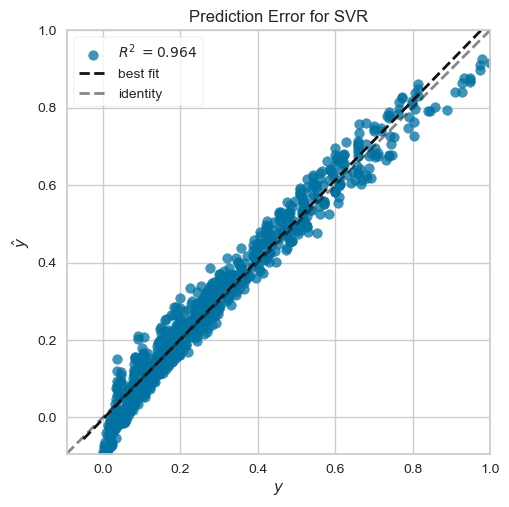

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [18]:
visualizer = PredictionError(svr_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

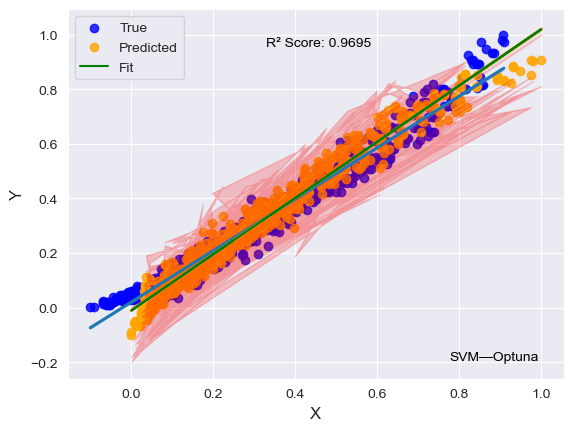

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
r2 = r2_score(y_test, y_pred)
slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test
sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'SVM—Optuna', transform=plt.gca().transAxes, ha='right', color='black')
plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()